In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('datos_limpios.csv') 

In [3]:
X = data.drop(['Salary'], axis=1)
Y = data['Salary']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

Busqueda del mejor hiperparametro

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': range(10, 25)}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

c:\Users\xavie\miniconda3\envs\datasc\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 17}
Mejor puntuación de validación cruzada:
0.6831873753179962


In [5]:
best_clf = grid_search.best_estimator_
best_clf


DecisionTreeClassifier(max_depth=17, random_state=42)

In [6]:
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

Entrenamiento y resultado del dataset

In [7]:
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print('El coeficiente de determinacion en train es:',accuracy_score(Y_train,y_train_pred))
print('El coeficiente de determinacion en test es:', accuracy_score(Y_test,y_test_pred))

El coeficiente de determinacion en train es: 0.7736212056434374
El coeficiente de determinacion en test es: 0.678963110667996


Arbol de decision

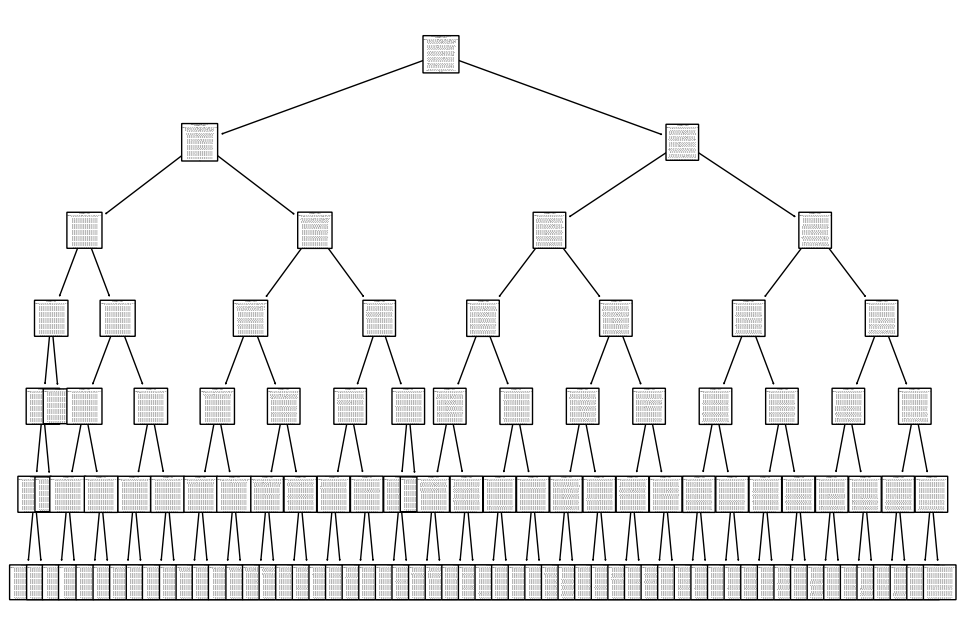

In [14]:
from sklearn import tree
best_clf = DecisionTreeClassifier(max_depth=6) #limitado a 6 ramas 
best_clf.fit(X_train, Y_train)

plt.figure(figsize=(12, 8))
tree.plot_tree(best_clf, rounded=True, feature_names=X_train.columns, impurity=False, node_ids=False, proportion=False, precision=0)
plt.show()